In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [82]:
all_data = pd.concat([train_df.drop('SalePrice', axis=1), test_df], axis=0, ignore_index=True)

In [84]:
train_ids = train_df['Id']
test_ids = test_df['Id']
all_data = all_data.drop('Id', axis=1)

In [86]:
print(f"Combined data shape: {all_data.shape}")
print(f"Training data shape (original): {train_df.shape}")
print(f"Test data shape (original): {test_df.shape}")

Combined data shape: (2919, 79)
Training data shape (original): (1460, 81)
Test data shape (original): (1459, 80)


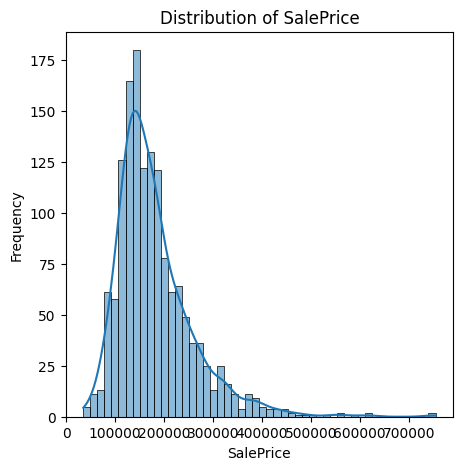

In [88]:
plt.figure(figsize=(5, 5))
sns.histplot(train_df['SalePrice'], kde=True, bins=50)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

In [90]:
numerical_features = all_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = all_data.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical features: {len(numerical_features)}")
print(f"Categorical features: {len(categorical_features)}")


Numerical features: 36
Categorical features: 43


In [92]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))])

In [94]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [96]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])


In [98]:
print("\nApplying preprocessing...")
X_processed = preprocessor.fit_transform(all_data)


Applying preprocessing...


In [100]:
X_train_processed = X_processed[:len(train_df)]
X_test_processed = X_processed[len(train_df):]
y_train = train_df['SalePrice']

In [102]:

dt_model = DecisionTreeRegressor(random_state=42)

In [104]:
dt_model.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

In [106]:
y_train_pred_dt = dt_model.predict(X_train_processed)


In [108]:
mae_train_dt = mean_absolute_error(y_train, y_train_pred_dt)
r2_train_dt = r2_score(y_train, y_train_pred_dt)


print(f"Mean Absolute Error (MAE): {mae_train_dt:.2f}")
print(f"R-squared (R2): {r2_train_dt:.2f}")

Mean Absolute Error (MAE): 0.00
R-squared (R2): 1.00



from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt_model,filled=True)
plt.show()